In [1]:
# -*- coding: utf-8 -*-
import wave
import copy
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 遅延FIRフィルタを作成し、インパルス状の信号を時間τだけ遅延させよ。
# τはサンプリング周期の整数倍の場合とそうでない場合の両方について示せ
# 音声データの読み込み
wf = wave.open("exam.wav", "r")
channel = wf.getnchannels()
fs = wf.getframerate()
frames = wf.getnframes()
sample_width = wf.getsampwidth()
T = 1 / fs
t = np.arange(0, frames * T, T)

org_signal = wf.readframes(frames)
org_signal = np.frombuffer(org_signal, dtype="int16") / ((2 ** 8) ** sample_width / 2)
test_signal = org_signal

# モノラル:1 ステレオ:2
print("チャンネル数: ", channel)
print("サンプリング周波数: ", fs)
print("サンプリング周期: ", T)
print("フレーム数: ", frames)
print("サンプル幅: ", sample_width)
print("各パラメータ: ", wf.getparams())
print("--------------------\n\n")
print("signal type: ", type(signal))

チャンネル数:  1
サンプリング周波数:  11025
サンプリング周期:  9.070294784580499e-05
フレーム数:  55296
サンプル幅:  2
各パラメータ:  _wave_params(nchannels=1, sampwidth=2, framerate=11025, nframes=55296, comptype='NONE', compname='not compressed')
--------------------


signal type:  <class 'module'>


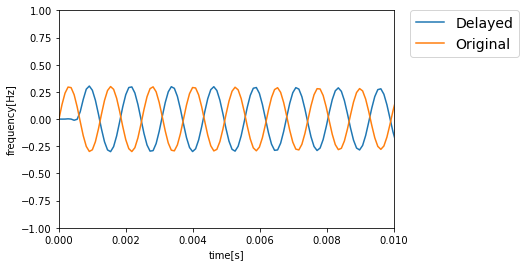

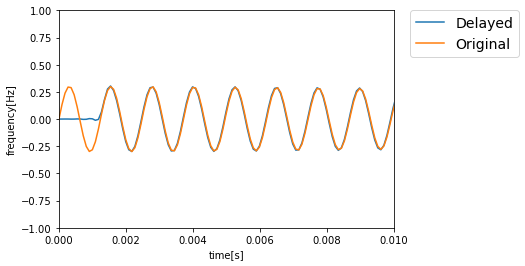

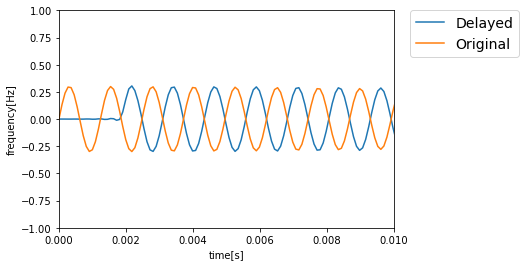

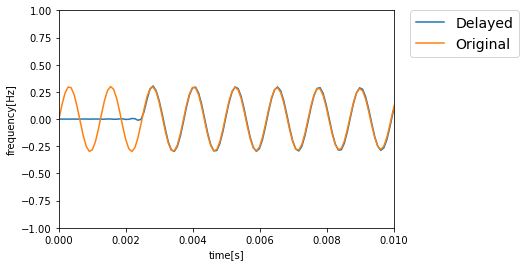

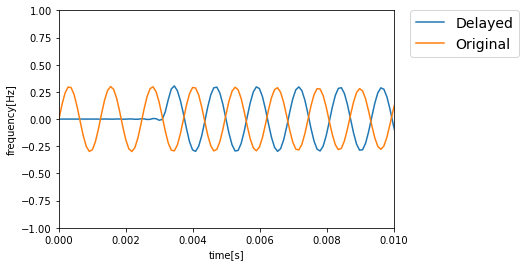

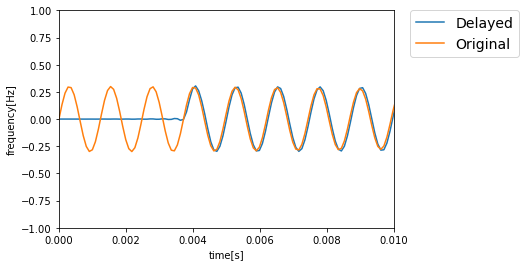

In [3]:
delay_list = [14*1, 14*2, 14*3, 14*4, 14*5, 14*6]
for delay in delay_list:
    delayfilter = signal.firwin(numtaps=delay, cutoff=fs/4, fs=fs)
    sig = signal.lfilter(delayfilter, 1, test_signal)
    ffted = np.fft.fft(sig)
    amp = np.abs(ffted / (frames / 2))

    plt.plot(t, sig, label="Delayed")
    plt.plot(t, org_signal, label="Original")
    plt.xlim(0, 0.01)
    plt.ylim(-1, 1)
    plt.xlabel("time[s]")
    plt.ylabel("frequency[Hz]")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
    plt.show()

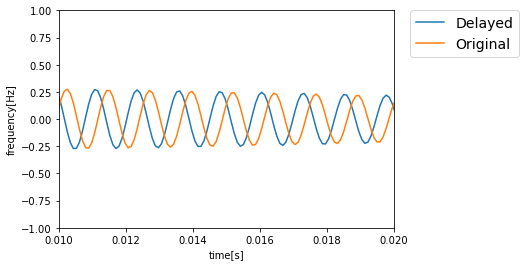

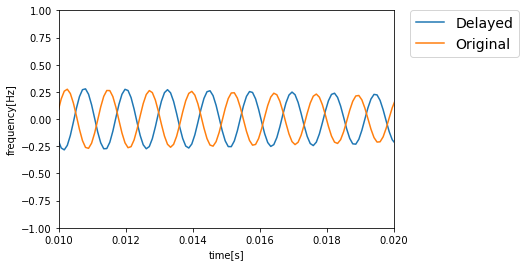

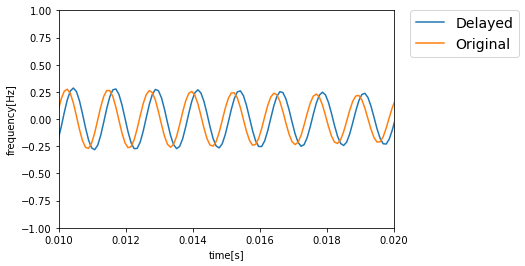

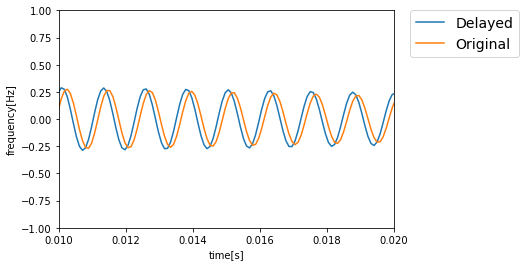

In [4]:
delay_list = [20*1, 20*2, 20*3, 20*4]
for delay in delay_list:
    delayfilter = signal.firwin(numtaps=delay, cutoff=fs/4, fs=fs)
    sig = signal.lfilter(delayfilter, 1, test_signal)
    ffted = np.fft.fft(sig)
    amp = np.abs(ffted / (frames / 2))

    plt.plot(t, sig, label="Delayed")
    plt.plot(t, org_signal, label="Original")
    plt.xlim(0.01, 0.02)
    plt.ylim(-1, 1)
    plt.xlabel("time[s]")
    plt.ylabel("frequency[Hz]")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
    plt.show()

In [5]:
# インパルス信号を作成
impulse_signal = signal.unit_impulse(100, 10)
impulse_signal

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

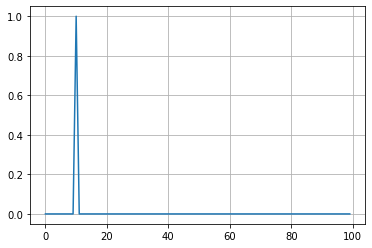

In [6]:
plt.plot(impulse_signal)
plt.grid()
plt.show()

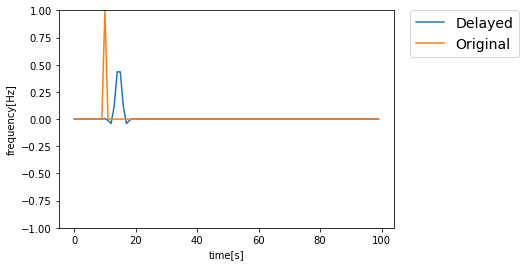

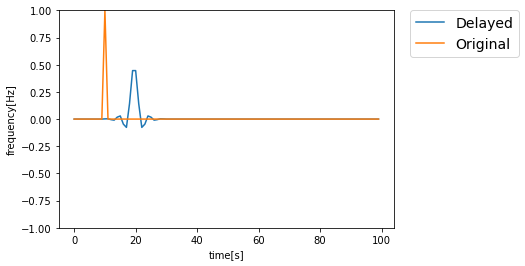

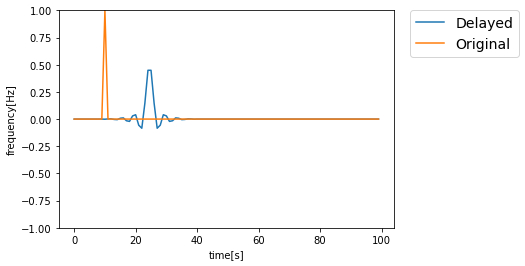

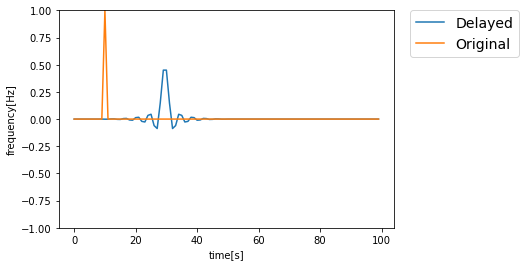

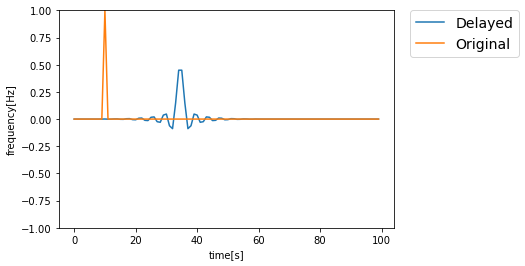

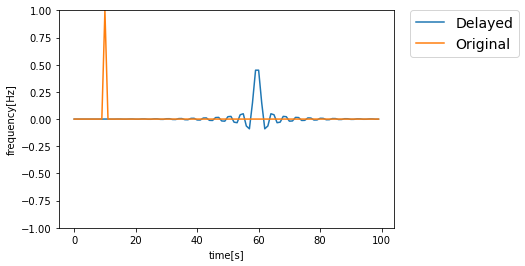

In [7]:
org_impulse_signal = copy.deepcopy(impulse_signal)
delay_list = [1*10, 1*20, 1*30, 1*40, 1*50, 1*100]
for delay in delay_list:
    delayfilter = signal.firwin(numtaps=delay, cutoff=fs/4, fs=fs)
    sig = signal.lfilter(delayfilter, 1, impulse_signal)
    ffted = np.fft.fft(sig)
    amp = np.abs(ffted / (frames / 2))

    plt.plot(sig, label="Delayed")
    plt.plot(org_impulse_signal, label="Original")
#     plt.xlim(0, 0.01)
    plt.ylim(-1, 1)
    plt.xlabel("time[s]")
    plt.ylabel("frequency[Hz]")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
    plt.show()

In [10]:
delay_list = [0.01*2, 0.01*4, 0.01*6, 0.01*8, 0.01*10, 0.01*14]
for delay in delay_list:
    delayfilter = signal.firwin(numtaps=delay, cutoff=fs/4, fs=fs)
    sig = signal.lfilter(delayfilter, 1, impulse_signal)
    ffted = np.fft.fft(sig)
    amp = np.abs(ffted / (frames / 2))

    plt.plot(sig, label="Delayed")
    plt.plot(org_impulse_signal, label="Original")
#     plt.xlim(0, 0.01)
    plt.ylim(-1, 1)
    plt.xlabel("time[s]")
    plt.ylabel("frequency[Hz]")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
    plt.show()

ValueError: Window length M must be a non-negative integer